In [88]:
import time
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

### *Function to plot bars*

In [89]:
def plot_bars(func, func2, colours):
    index = np.arange(6)
    width = 0.4

    # bar 1 for f-measure
    f1_score_bar = func.iloc[0]
    bar1 = plt.bar(index, f1_score_bar, width, color=colours[0], edgecolor='snow')

    # bar 2 for f-measure
    f2_score_bar = func2.iloc[0]
    bar2 = plt.bar(index+width, f2_score_bar, width, color=colours[1], edgecolor='snow')


    plt.xticks(index+width, func.columns)

    plt.legend((bar1, bar2), 
               ('KNN', 'Holdout'),
               loc='center right')
    
    plt.xlabel('Trial Number')
    plt.ylabel('F-Measure')
    plt.title('KNN vs. Holdout Performance')
   
    
    # average f-measure and time lines
    plt.axhline(func.iloc[0,-1], alpha=0.9, linestyle='dotted', color=colours[0]) 
    plt.axhline(func2.iloc[0,-1], alpha=0.9, linestyle='dotted', color=colours[1])
    
    plt.show()

# Part I (inference efficiency) - German Credit Data

## Build a k-NN model and compare its efficiency with another model:

### 1. Perform preprocessing (normalization) if it is necessary


In [90]:
df = pd.read_csv('german.data-numeric', sep='\s+', header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1


In [91]:
df.columns = np.arange(25).astype(str)
df.columns = [*df.columns[:-1], 'class']
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,class
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1


In [92]:
target = df['class']               
features = df.drop(['class'], axis=1)

# normalize the data, excluding the class column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

In [93]:
print(f'Scaled Data \n{scaled_data}')

Scaled Data 
[[0.         0.02941176 1.         ... 0.         0.         1.        ]
 [0.33333333 0.64705882 0.5        ... 0.         0.         1.        ]
 [1.         0.11764706 1.         ... 0.         1.         0.        ]
 ...
 [1.         0.11764706 0.5        ... 0.         0.         1.        ]
 [0.         0.60294118 0.5        ... 0.         0.         1.        ]
 [0.33333333 0.60294118 1.         ... 0.         0.         1.        ]]


In [94]:
# make new dataframe with scaled data and class column
df_scaled = pd.concat([pd.DataFrame(scaled_data), target], axis=1)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,class
0,0.000000,0.029412,1.00,0.054945,1.00,1.00,0.666667,1.000000,0.000000,0.857143,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.333333,0.647059,0.50,0.318681,0.00,0.50,0.333333,0.333333,0.000000,0.053571,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,1.000000,0.117647,1.00,0.104396,0.00,0.75,0.666667,0.666667,0.000000,0.535714,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,0.000000,0.558824,0.50,0.423077,0.00,0.75,0.666667,1.000000,0.333333,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.000000,0.294118,0.75,0.258242,0.00,0.50,0.666667,1.000000,1.000000,0.607143,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.082418,0.00,0.75,0.333333,1.000000,0.000000,0.214286,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
996,0.000000,0.382353,0.50,0.203297,0.00,0.50,0.000000,1.000000,0.333333,0.375000,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
997,1.000000,0.117647,0.50,0.032967,0.00,1.00,0.666667,1.000000,0.666667,0.339286,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
998,0.000000,0.602941,0.50,0.087912,0.00,0.50,0.666667,1.000000,1.000000,0.071429,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2


### 2. Build k-NN classifier for k = 5

In [95]:
def kNN(df, n, split, avg):
    Y = df['class']               
    X = df.drop(['class'], axis=1)
    
    # split data into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
    
    if split == 'validation':
        # split train into validation
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
        #print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape )
        # fit the 81% train data
        neigh = KNeighborsClassifier(n_neighbors=n)
        neigh.fit(X_train, y_train)
    
        # apply the model to the validation set
        start = time.time()
        y_pred = neigh.predict(X_val)
        end = time.time()
    
        f_measure = f1_score(y_val, y_pred, average=avg)
        duration = end-start;
    
    else:
        # fit the 90% train data 
        neigh = KNeighborsClassifier(n_neighbors=n)
        neigh.fit(X_train, y_train)
        
        # apply the model to the test set
        start = time.time()
        y_pred = neigh.predict(X_test)
        end = time.time()
        
        f_measure = f1_score(y_test, y_pred, average=avg)
        duration = end-start;

    return f_measure, duration

In [96]:
def kNNeighbours(df, n, split, avg):
    f_measure = []
    time_after_time = []
    
    for i in range(5):
        results = kNN(df, n, split, avg)
        f_measure.append(results[0])
        time_after_time.append(results[1])
    
    f_mean = np.mean(f_measure)
    f_measure.append(f_mean)
    
    t_mean = np.mean(time_after_time)
    time_after_time.append(t_mean)
    
    table = pd.DataFrame([f_measure, time_after_time], 
                          index=['F-Measure', 'Time'],
                          columns=None)
    table.columns = [*table.columns[:-1], 'Average']
    
    return table

In [105]:
# func. params = data, # neighbours, split (test or validation), weighted vs. binary data  
german_knn = kNNeighbours(df_scaled, 5, 'test', 'binary')
german_knn

,0,1,2,3,4,Average
F-Measure,0.789116,0.820144,0.787879,0.783784,0.805369,0.797258
Time,0.019778,0.012519,0.039373,0.015630,0.031255,0.023711


### 3. Repeat (2) for building a decision tree classifier (use default parameters)

In [98]:
def holdout(df, depth, split, avg):
    # build the model
    Y = df['class']               
    X = df.drop(['class'], axis=1) 

    # split data into % train and % test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1) 

    # train decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    #clf = clf.fit(X_train, y_train)

    # apply to validation set 
    if split == 'validation':
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
        clf = clf.fit(X_train, y_train)
        
        start = time.time()
        y_pred = clf.predict(X_val)
        end = time.time()
        f_score = f1_score(y_val, y_pred, average=avg)
    
    # apply to train set
    elif split == 'train':
        clf = clf.fit(X_train, y_train)
        start = time.time()
        y_pred = clf.predict(X_train)
        end = time.time()
        f_score = f1_score(y_train, y_pred, average=avg)
    
    # default: apply to test set
    else:
        clf = clf.fit(X_train, y_train)
        start = time.time()
        y_pred = clf.predict(X_test)
        end = time.time()
        f_score = f1_score(y_test, y_pred, average=avg)
    
        
    duration = end-start;
                               
    return f_score, duration

In [99]:
def holdouts(df, depth, split, avg):
    f_measure = []
    time_after_time = []
    
    # call holdout n times
    for i in range(5):
        results = holdout(df, depth, split, avg)
        f_measure.append(results[0])
        time_after_time.append(results[1])
    
    # get final average
    f_mean = np.mean(f_measure)
    f_measure.append(f_mean)
    
    t_mean = np.mean(time_after_time)
    time_after_time.append(t_mean)
    
    table = pd.DataFrame([f_measure, time_after_time], 
                          index=['F-Measure', 'Time'],
                          columns=None)
    table.columns = [*table.columns[:-1], 'Average']
    
    return table

In [106]:
german_holdout = holdouts(df_scaled, 3, 'test', 'binary')
german_holdout

,0,1,2,3,4,Average
F-Measure,0.818792,0.781457,0.814815,0.879518,0.876543,0.834225
Time,0.003998,0.002996,0.000000,0.000000,0.002999,0.001999


### 4. Compare results of part (2) and (3) using appropriate charts

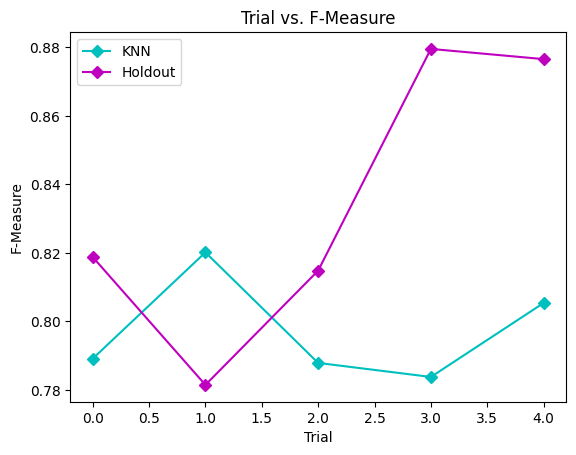

In [107]:
# plot the evaluation for the 5 performances of both methods (0-4 index)
cols = german_knn.columns[:-1]
l1 = german_knn.iloc[0,:-1].values
l2 = german_holdout.iloc[0,:-1].values

plt.xlabel('Trial')
plt.ylabel('F-Measure')
plt.title('Trial vs. F-Measure')

plt.plot(cols, l1, 'cD-', l2, 'mD-')
plt.legend(['KNN', 'Holdout'])

Figure 1: Trial vs. F-Measure of k-NN and holdout
- The average f-measure for holdout (83%) is slightler higher on average than k-NN (80%). The 5 trials show that the f-measure is greater for holdout from trials 3 (ind. 2.0), 4, and 5.

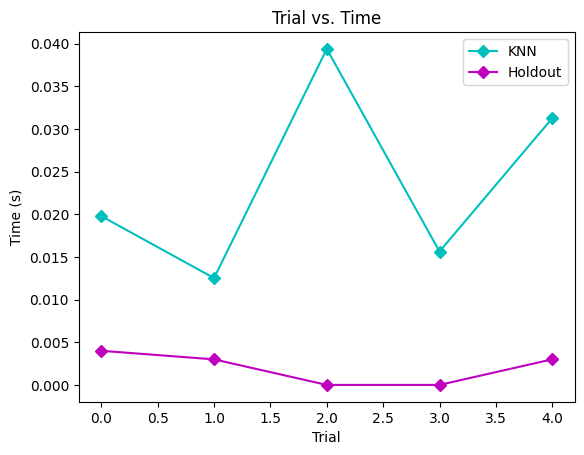

In [108]:
# compare the time taken
cols = german_knn.columns[:-1]
l1 = german_knn.iloc[1,:-1].values
l2 = german_holdout.iloc[1,:-1].values

plt.xlabel('Trial')
plt.ylabel('Time (s)')
plt.title('Trial vs. Time')

plt.plot(cols, l1, 'cD-', l2, 'mD-')
plt.legend(['KNN', 'Holdout'])

Figure 2: Trial vs. Time of k-NN and holdout
- The k-NN model is faster to predict labels for the test data instances than holdout (decision tree classifier).

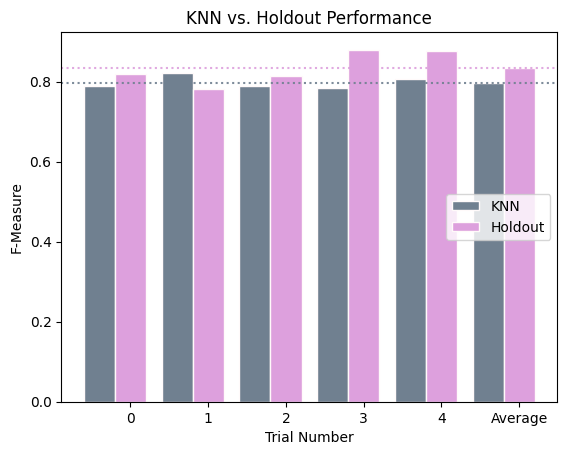

In [109]:
muted = ['slategrey', 'plum']
plot_bars(german_knn, german_holdout, muted)

Figure 3: Trial vs. F-Measure of k-NN and holdout
- The f-measure for holdout is slightler higher than k-NN. The f-measure across each iteration (index 0-4) remains close to their respective averages (above ~78%) and does not deviate much.

# Part II (model selection) - German Credit Data

## Perform model selection for the k-NN and decision tree:

### 1. Perform preprocessing (normalization) if it is necessary

In [110]:
# preprocessing done in previous step
df_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,class
0,0.000000,0.029412,1.0,0.054945,1.0,1.00,0.666667,1.000000,0.0,0.857143,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.333333,0.647059,0.5,0.318681,0.0,0.50,0.333333,0.333333,0.0,0.053571,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,1.000000,0.117647,1.0,0.104396,0.0,0.75,0.666667,0.666667,0.0,0.535714,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


### 2. Build k-NN classifier for different k (1, 2, 3, 4, 5) and select the best k

In [129]:
def kNNeighbours_iter(df, split, avg):
    k = []
    f_mean = []
    diff_k = range(1,6) # k(1,2,3,4,5)
    
    for neighbours in diff_k:
        knn = kNNeighbours(df, neighbours, split, avg)
        k.append(neighbours)
        # only get the average f-measure for k(1,2,3,4,5) 
        # since the function default is to perform 5 iterations for each k
        f_mean.append(knn.iloc[0, -1])
    
    results = list(zip(k, f_mean))
    table = pd.DataFrame(results, columns=['K', 'F-Score'])
    
    # get row with the best k
    top = table[table['F-Score'] == table['F-Score'].max()]
    print(f'Best K: \n{top}')
    
    return table

In [132]:
model_knn = kNNeighbours_iter(df_scaled, 'validation', 'binary')
model_knn

Best K: 
   K   F-Score
3  4  0.839142


,K,F-Score
0,1,0.775729
1,2,0.794132
2,3,0.801358
3,4,0.839142
4,5,0.797749


### 3. Build the decision tree model using the train data set and select the best tree

In [113]:
def holdouts_iter(df, split, avg):
    tree_depth = []
    f_mean = []
    max_depths = range(3, 11) # tree depth (3-10)
    
    for depths in max_depths:
        hold = holdouts(df, depths, split, avg)
        tree_depth.append(depths)
        f_mean.append(hold.iloc[0, -1])
    
    results = list(zip(tree_depth, f_mean))
    table = pd.DataFrame(results, columns=['Depth', 'F-Score'])
    
    # get row with the best k
    top = table[table['F-Score'] == table['F-Score'].max()]
    print(f'Best tree depth: \n{top}')
    
    return table                     

In [114]:
model_hold = holdouts_iter(df_scaled, 'validation', 'binary')
model_hold

Best tree depth: 
   Depth   F-Score
2      5  0.824089


,Depth,F-Score
0,3,0.797506
1,4,0.787552
2,5,0.824089
3,6,0.807623
4,7,0.806829
5,8,0.811345
6,9,0.799760
7,10,0.766998


### *Comparison*

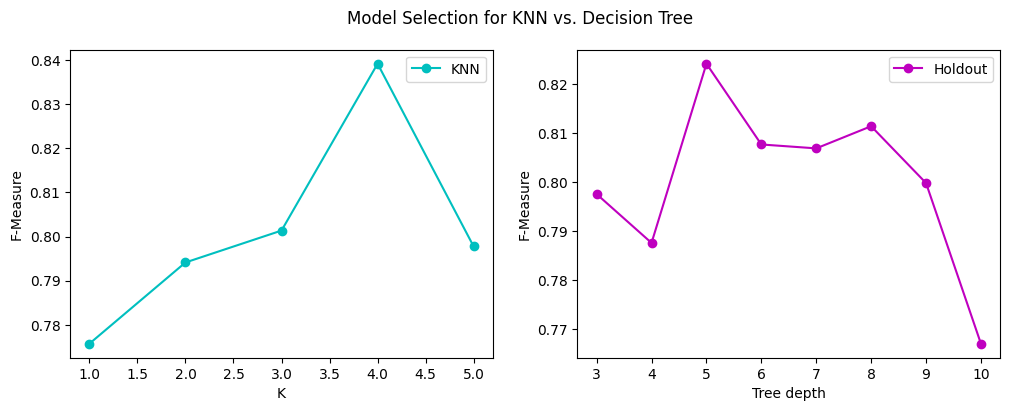

In [133]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

ax[0].plot(model_knn['K'], model_knn['F-Score'], 'co-', label='KNN')
ax[0].set_xlabel('K')

ax[1].plot(model_hold['Depth'], model_hold['F-Score'], 'mo-', label='Holdout')
ax[1].set_xlabel('Tree depth')

for x in ax:
    x.set_ylabel('F-Measure')
    x.legend(loc='upper right')

fig.suptitle('Model Selection for KNN vs. Decision Tree')
plt.show()

Figure 4: Trial vs. F-Measure of k-NN and holdout
- The f-measure for k-NN increases with larger k (note: this is evident in k > 5); that is, as we increase the the number of neighbours the peformance of the model gets better. In contrast, the f-measure seems to decrease in decision tree classifier as the max tree depth increases; this can be due to overfitting.

# Part I (inference efficiency) - Waveform Database Generator

## Build a k-NN model and compare its efficiency with another model:

### 1. Perform preprocessing (normalization) if it is necessary

In [116]:
df2 = pd.read_csv('waveform.data', header=None)
df2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42,0
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18,1
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27,1
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37,0


In [117]:
df2.columns = np.arange(22).astype(str)
df2.columns = [*df2.columns[:-1], 'class']
df2.head(3)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0


### 2. Build k-NN classifier for k = 5

In [118]:
wave_knn = kNNeighbours(df2, 5, 'test', 'weighted')
wave_knn

,0,1,2,3,4,Average
F-Measure,0.789954,0.835815,0.801047,0.811962,0.818937,0.811543
Time,0.091224,0.093755,0.093738,0.098938,0.092461,0.094023


### 3. Repeat (2) for building a decision tree classifier (use default parameters)

In [119]:
wave_holdout = holdouts(df2, 3, 'test', 'weighted')
wave_holdout

,0,1,2,3,4,Average
F-Measure,0.722876,0.694410,0.733399,0.712178,0.712913,0.715155
Time,0.004250,0.003003,0.000000,0.000000,0.015610,0.004573


### 4. Compare results of part (2) and (3) using appropriate charts

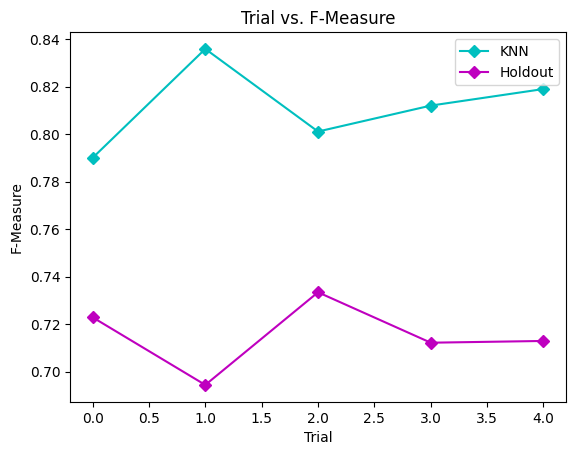

In [120]:
cols = wave_knn.columns[:-1]
l1 = wave_knn.iloc[0,:-1].values
l2 = wave_holdout.iloc[0,:-1].values

plt.xlabel('Trial')
plt.ylabel('F-Measure')
plt.title('Trial vs. F-Measure')

plt.plot(cols, l1, 'cD-', l2, 'mD-')
plt.legend(['KNN', 'Holdout'])

Figure 5: Trial vs. F-Measure of k-NN and holdout
- The f-measure for k-NN is higher than holdout across each iteration.

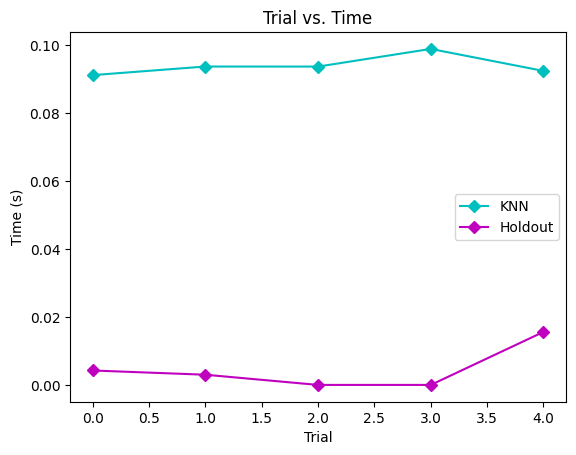

In [121]:
cols = wave_knn.columns[:-1]
l1 = wave_knn.iloc[1,:-1].values
l2 = wave_holdout.iloc[1,:-1].values

plt.xlabel('Trial')
plt.ylabel('Time (s)')
plt.title('Trial vs. Time')

plt.plot(cols, l1, 'cD-', l2, 'mD-')
plt.legend(['KNN', 'Holdout'])

Figure 6: Trial vs. Time of k-NN and holdout
- The time for the k-NN model to predict the test label instances is much greater than holdout.

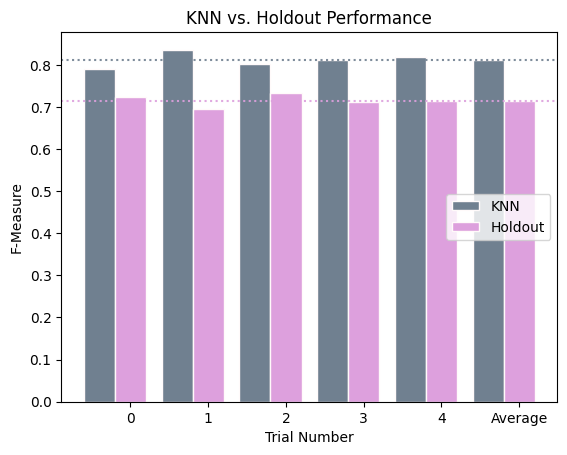

In [122]:
plot_bars(wave_knn, wave_holdout, muted)

Figure 7: Trial vs. F-Measure of k-NN and holdout
- The f-measure for k-NN is on average greater than holdout by approximately 10%. 

# Part II (model selection) - Waveform Database Generator

## Perform model selection for the k-NN and decision tree:

### 1. Perform preprocessing (normalization) if it is necessary

No.

### 2. Build k-NN classifier for different k (1, 2, 3, 4, 5) and select the best k

In [123]:
model_knn_ = kNNeighbours_iter(df2, 'validation', 'weighted')
model_knn_

Best K: 
   K   F-Score
4  5  0.814523


,K,F-Score
0,1,0.787653
1,2,0.764854
2,3,0.807444
3,4,0.812427
4,5,0.814523


### 3. Build the decision tree model using the train data set and select the best tree

In [124]:
model_hold_ = holdouts_iter(df2, 'validation', 'weighted')
model_hold_ 

Best tree depth: 
   Depth  F-Score
6      9  0.77388


,Depth,F-Score
0,3,0.685019
1,4,0.700650
2,5,0.756373
3,6,0.762238
4,7,0.753886
5,8,0.752918
6,9,0.773880
7,10,0.750315


### *Comparison*

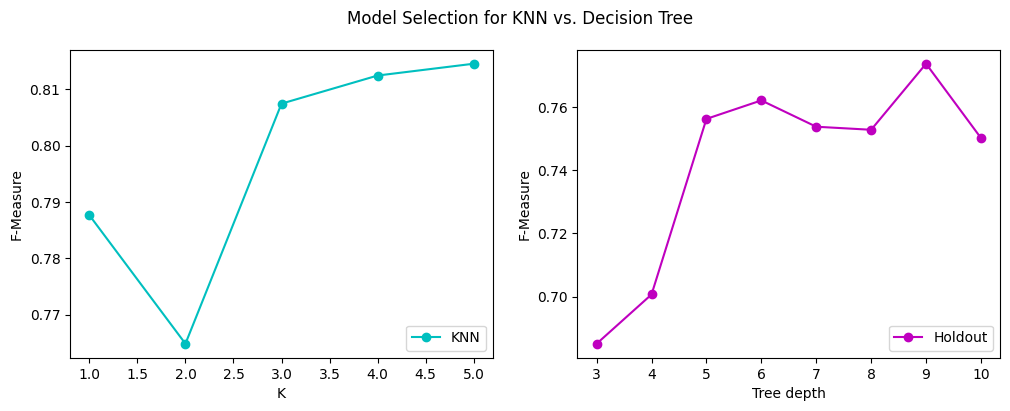

In [125]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

ax[0].plot(model_knn_['K'], model_knn_['F-Score'], 'co-', label='KNN')
ax[0].set_xlabel('K')

ax[1].plot(model_hold_['Depth'], model_hold_['F-Score'], 'mo-', label='Holdout')
ax[1].set_xlabel('Tree depth')

for x in ax:
    x.set_ylabel('F-Measure')
    x.legend(loc='lower right')

fig.suptitle('Model Selection for KNN vs. Decision Tree')
plt.show()

Figure 8: Trial vs. F-Measure of k-NN and holdout
- The f-measure for k-NN increases with larger k; that is, as we increase the the number of neighbours the peformance of the model gets better. In contrast, the f-measure seems to decrease in decision tree classifier as the max tree depth increases; this can be due to overfitting.